interactive(children=(IntSlider(value=0, description='step', max=149), Output()), _dom_classes=('widget-intera…

<function __main__.display_slice(step)>

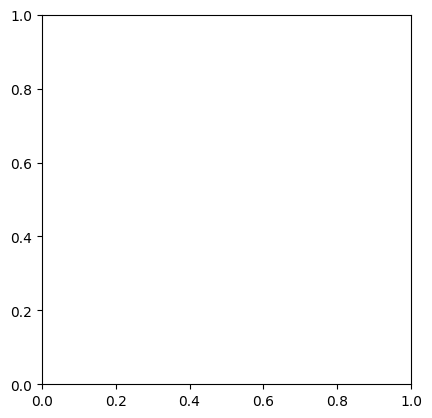

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider
from PIL import Image
import os

# Replace 'path/to/your/images' with the path to your image folder
image_folder = 'results/blind_blur/progress/img/'

# Create a list of image filenames in the folder
images = [os.path.join(image_folder, img) for img in sorted(os.listdir(image_folder))]
# Read images and store them in a list
image_list = [Image.open(image) for image in images]

# Now, image_list is a list of PIL Image objects representing your images

# Function to display a slice of the volume
def display_slice(step):
    plt.imshow(image_list[step])
    plt.title(f'Step {step * 10}')
    plt.colorbar()
    plt.show()

# Using ipywidgets to create an interactive slider
interact(display_slice, step=IntSlider(min=0, max=len(image_list) - 1, step=1, value=0))

## Figure 1: deblurring sample

/tmp/ipykernel_179020/2858074612.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


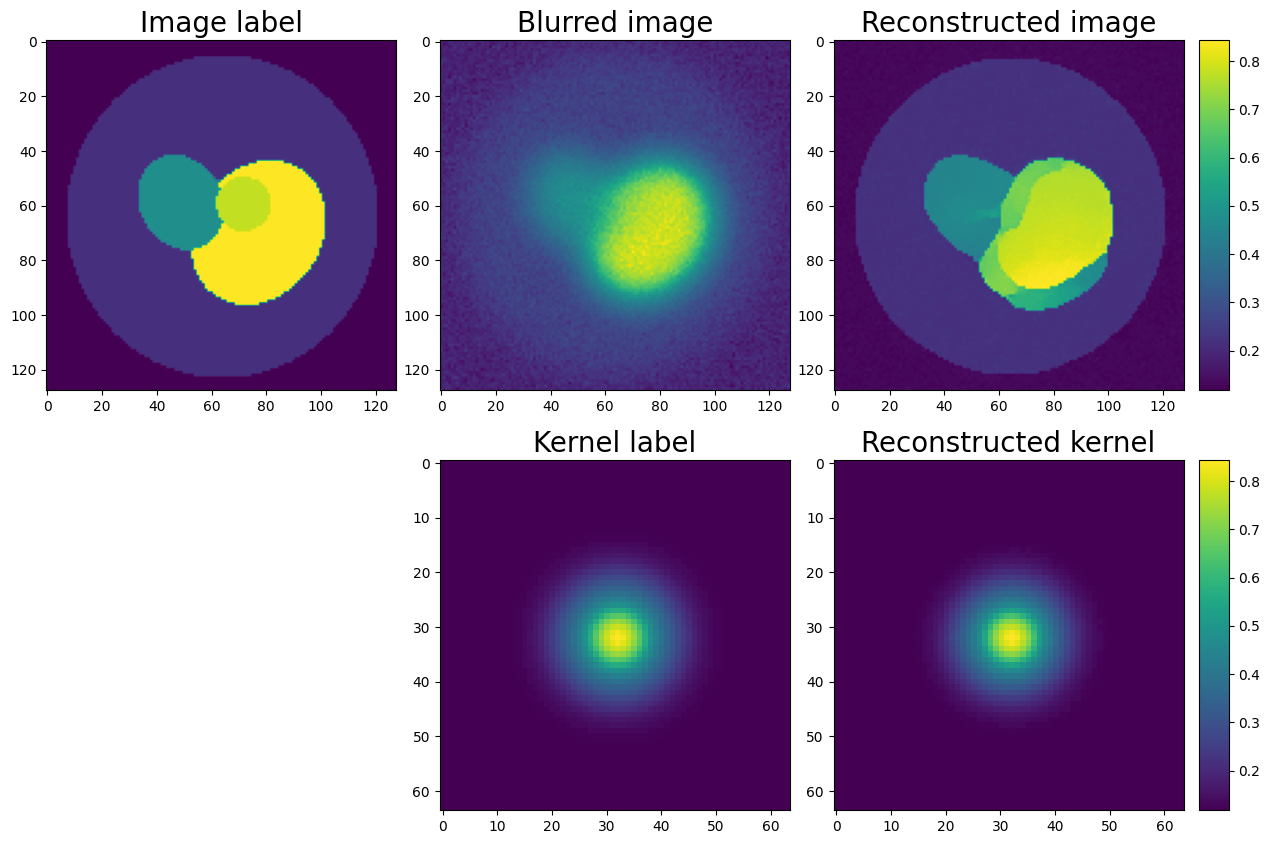

In [23]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from PIL import Image  # Assuming you have PIL installed
import numpy as np

# Generate some sample data (replace with your paths)
path_img_label = 'results/blind_blur/label/img_00000.png'
path_kernel_label = 'results/blind_blur/label/ker_00000.png'
path_img_input = 'results/blind_blur/input/00000.png'
path_img_recons = 'results/blind_blur/recon/img_00000.png'
path_kernel_recons = 'results/blind_blur/recon/ker_00000.png'


img_label = np.array(Image.open(path_img_label).convert('L')) / 255
kernel_label = np.array(Image.open(path_kernel_label).convert('L')) / 255
img_input = np.array(Image.open(path_img_input).convert('L')) / 255
img_recons = np.array(Image.open(path_img_recons).convert('L')) / 255
kernel_recons = np.array(Image.open(path_kernel_recons).convert('L')) / 255

fontsize = 20

# Create a 2x2 subplot grid with different column widths
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1], wspace=0.05)

# Plot data on each subplot and add colorbars
axs = [plt.subplot(gs[0, 0]), plt.subplot(gs[0, 1]), plt.subplot(gs[0, 2]),
       plt.subplot(gs[1, 0]), plt.subplot(gs[1, 1]), plt.subplot(gs[1, 2])]

images = [img_label, img_input, img_recons, kernel_label, kernel_recons]
titles = ['Image label', 'Blurred image', 'Reconstructed image', 'Kernel label', 'Reconstructed kernel']

axs[0].imshow(images[0])
axs[0].set_title(titles[0], fontsize=fontsize)

axs[1].imshow(images[1])
axs[1].set_title(titles[1], fontsize=fontsize)

im2 = axs[2].imshow(images[2])
axs[2].set_title(titles[2], fontsize=fontsize)
cax = fig.add_axes([axs[2].get_position().x1 + 0.01, axs[2].get_position().y0, 0.02, axs[2].get_position().height])
fig.colorbar(im2, cax=cax)
            
axs[4].imshow(images[3])
axs[4].set_title(titles[3], fontsize=fontsize)

im5 = axs[5].imshow(images[4])
axs[5].set_title(titles[4], fontsize=fontsize)
cax = fig.add_axes([axs[5].get_position().x1 + 0.01, axs[5].get_position().y0, 0.02, axs[5].get_position().height])
fig.colorbar(im5, cax=cax)



axs[3].axis('off')  # Turn off the axis for the empty subplot in the second row

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()
